# 나랑 닮은 연예인을 찾아보자

## 1. 사진 모으기

1. 내 사진 찍기  
2. 비교할 사진 모으기

## 2. 얼굴 영역 자르기

* 내 얼굴이 이상없이 나오는지, 잘 탐지되었나 확인

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import face_recognition

[(1380, 1380, 2530, 230)]


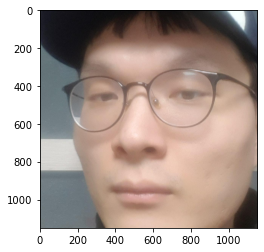

In [2]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1/jin3.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

In [3]:
from PIL import Image
pillow_image = Image.fromarray(cropped_face)
pillow_image.save('/home/ssac26/aiffel/face_embedding/pil_img/'+'jin_3.jpg')

In [13]:
# 얼굴 영역 자르는 함수
import face_recognition
import os
from PIL import Image

face_house = {}
def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    #pillow_image = Image.fromarray(image)
    #pillow_image.save('/home/ssac26/aiffel/face_embedding/pil_img/'+s[0]+'.jpg')
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_1'

In [15]:
## pil로 다른폴더에 저장하는데 일부확장자만 저장됨

In [16]:
# import glob

# for i in glob.glob(dir_path +('/*.jpg' or'/*.jpeg')):
    
#     a = i.split('/')
#     print(a[-1])
#     s = os.path.splitext(a[-1]) # 파일명만 구하기
#     print(s[0])
#     get_cropped_face(i)
    
    

In [17]:
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)

## 3. 얼굴 영역의 임베딩 추출하기

In [18]:
# 얼굴 영역 자르는 함수 - get_gropped_face

In [19]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [20]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file) # 경로를 병합하여 새 경로 생성
        face = get_cropped_face(img_path)
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [21]:
embedding_dict = get_face_embedding_dict(dir_path)

In [22]:
len(embedding_dict)

276

## 4. 모은 연예인 사진들과 비교하기

* 임베딩 거리구하기

In [23]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


In [24]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1
  
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [25]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
pic = []
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            pic.append(sorted_faces[i][0])
            image = os.getenv('HOME')+'/aiffel/face_embedding/images_1/'+sorted_faces[i][0]+'.jpg'
            figure = img.imread(image)
            plt.imshow(figure)
            plt.show()
#             

순위 1 : 이름(jin4), 거리(0.13947127368795945)


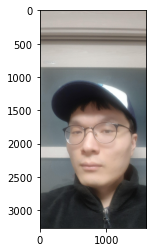

순위 2 : 이름(하현우), 거리(0.4947852348359854)


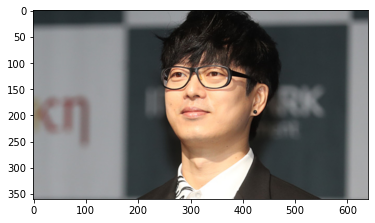

순위 3 : 이름(정수빈), 거리(0.4978176484761328)


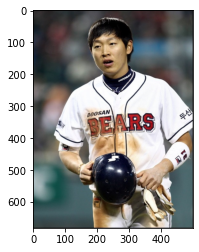

순위 4 : 이름(박건우), 거리(0.509079515392149)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ssac26/aiffel/face_embedding/images_1/박건우.jpg'

In [29]:
# jin3 vs 가장 닮은 사람은 누굴까요?
get_nearest_face('jin3')

In [ ]:
# 다른 동일인물의 사진과는 거리가 매우 근접하게 나옴, 거의 동일한 구도에서 찍은 사진이라 그런것으로 보임
# 그 외에는 차이가 크지 않아보임
# jpg파일만 시각화가 되는데 실제론 다른 확장자도 존재, 임베딩할때는 다 되는데 시각화에선 왜 안되나

In [ ]:
# 연습

In [ ]:
pic

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
figure = img.imread('/home/ssac26/aiffel/face_embedding/images_1/박건우.jpg')
plt.imshow(figure)
plt.show()